In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
import sklearn.metrics as mt
import matplotlib.pyplot as plt

In [2]:
data_ = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/Adversiting.csv")
data = data_.copy()
data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop("ID", axis=1, inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
y = data["Sales"]
X = data.drop("Sales", axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lr = LinearRegression().fit(X_train, y_train)

In [7]:
pred = lr.predict(X_test)

In [8]:
r2 = mt.r2_score(y_test, pred)
mse = mt.mean_squared_error(y_test, pred)
print(f"R2= {r2}   MSE= {mse}")

R2= 0.899438024100912   MSE= 3.1740973539761046


### with Ridge

In [9]:
rm = Ridge(alpha=0.1).fit(X_train, y_train)

In [10]:
pred_rm = rm.predict(X_test)

In [11]:
r2 = mt.r2_score(y_test, pred_rm)
mse = mt.mean_squared_error(y_test, pred_rm)
print(f"R2= {r2}   MSE= {mse}")

R2= 0.899438032178932   MSE= 3.1740970990047614


#### !!! alpha hipermatresi arttıkça R-sqaured değeri azalır, model parametreleri sıfıra yakınsar.

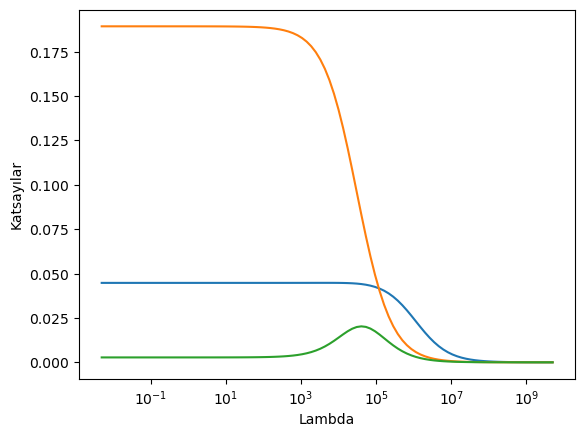

In [12]:
params = []
lambdas = 10 ** np.linspace(10, -2, 100) * 0.5

for i in lambdas:
    ridge_model = Ridge(alpha=i).fit(X_train, y_train)
    params.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdas, params)
ax.set_xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Katsayılar")
plt.show()

### RidgeCV

In [13]:
data_2 = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/hitters.csv")
data2 = data_2.copy()
data2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [14]:
data2.drop(["League","Division","NewLeague"], axis=1, inplace=True)
data2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


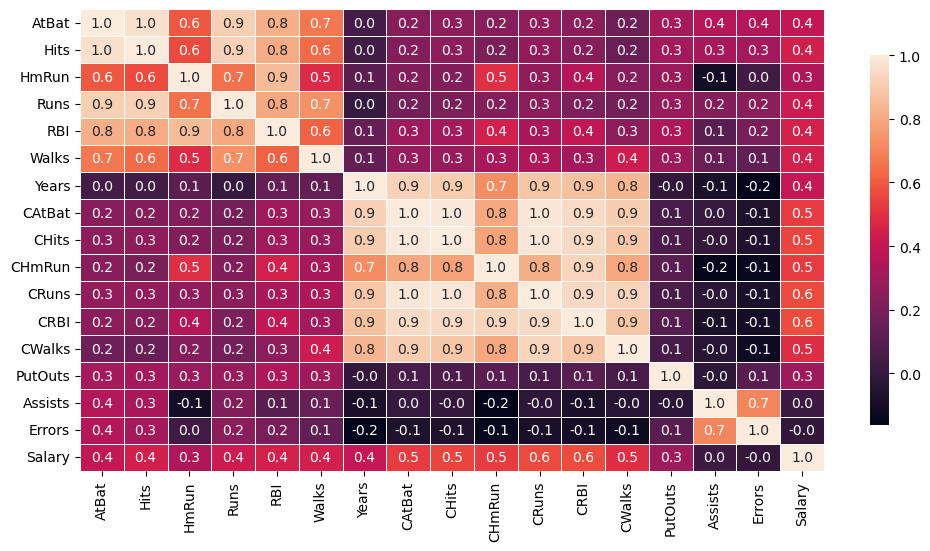

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(data2.corr(),
            annot = True, 
            linewidths = 0.5,
            cbar_kws={"shrink": 0.8}, square=False,
            fmt=".1f");

In [16]:
data2.dropna(inplace = True)

In [17]:
X = data2.drop("Salary", axis = 1)
y = data2["Salary"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
alphas = 10 ** np.linspace(10, -2, 100) * 0.5
ridge_cv = RidgeCV(alphas = alphas, scoring = "r2")
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)

873764.2000038414


In [20]:
ridge_new = Ridge(ridge_cv.alpha_)
ridge_new.fit(X_train, y_train)
preds_ridge_new = ridge_new.predict(X_test)
r2_ridge_new = mt.r2_score(y_test, preds_ridge_new)

print("R2 RidgeCV:", r2_ridge_new)

R2 RidgeCV: 0.20528815729983751


In [21]:
ridge_new.coef_

array([ 0.5274086 ,  0.35341339,  0.0334649 ,  0.18881554,  0.14015272,
        0.19414186, -0.00173753, -0.17445121,  0.49552798,  0.12569538,
        0.43617082,  0.46167803,  0.01268043,  0.28515006,  0.0192423 ,
       -0.02096452])

In [ ]:
# r2 value is low but the model is not improved